In [36]:
####################################################################
#Trabalho 2
#Gabriel Busquim e Livia Aloise
####################################################################


In [1]:
#Leitura do arquivo com a base de dados

import pandas 

arquivo = "car.txt"
df = pandas.DataFrame(pandas.read_csv(arquivo, sep=","))
df.head()


,buyingPrice,maintPrice,numDoors,numPersons,spaceLuggage,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
#Conversão de dados categóricos em dados numéricos

df['buyingPrice'].replace(("low","med","high","vhigh"), (0,1, 2,3), inplace=True)
df['maintPrice'].replace(("low","med","high","vhigh"), (0,1, 2,3), inplace=True)
df['numDoors'].replace((2,3,4,"5more"), (0,1,2,3), inplace=True)
df['numPersons'].replace((2,4,"more"), (0,1,2), inplace=True)
df['spaceLuggage'].replace(( "small", "med","big"), (0,1,2), inplace=True)
df['safety'].replace(("low","med","high"), (0,1,2), inplace=True)
df['class'].replace(("unacc", "acc", "good", "vgood"), (0,1,2,3), inplace=True)

df.head()

,buyingPrice,maintPrice,numDoors,numPersons,spaceLuggage,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [3]:
df.describe()

,buyingPrice,maintPrice,spaceLuggage,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.000000,1.000000,0.414931
std,1.118358,1.118358,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.000000,2.000000,1.000000
max,3.000000,3.000000,2.000000,2.000000,3.000000


C:\Users\gbtat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


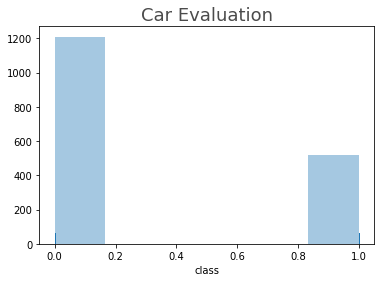

In [10]:
#Executar a celula duas vezes para o gráfico aparecer
import seaborn as sns
import matplotlib.pyplot as plt

graph = sns.distplot(df["class"], kde=False, rug=True);
graph.axes.set_title('Car Evaluation', fontsize=18, alpha=0.7)
plt.savefig('CarEvaluation.png',dpi=300, bbox_inches='tight')

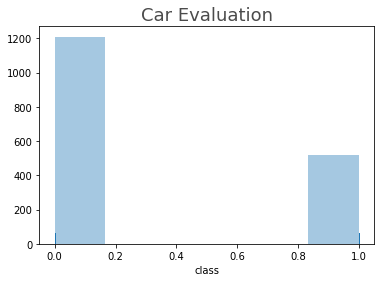

In [5]:
#junção das classes "médio,bom e muito bom" e exibião do gráfico para examinar o novo dataset
import numpy as np

df['class'] = pandas.Series(np.where(df['class'].values >= 1, 1, 0), df.index)
graph = sns.distplot(df["class"], kde=False, rug=True);
graph.axes.set_title('Car Evaluation', fontsize=18, alpha=0.7)
plt.savefig('CarEvaluation.png',dpi=300, bbox_inches='tight')

In [68]:
from sklearn.model_selection import train_test_split
import numpy as np

def trainTestSplit(inputData,outputData,testSize,seed):
    outputTrain,outputTest, inputTrain, inputTest = train_test_split(inputData, outputData, test_size=testSize,random_state=np.random.seed(seed))
    '''
    print(inputTrain)
    print("-----")
    print(outputTrain)
    print("-----")
    print(inputTest)
    print("-----")
    print(outputTest)
    '''
    return inputTrain,outputTrain,inputTest,outputTest                                                             

In [138]:
from sklearn import neighbors
import time

#função que recebe os atributos de entrada, o atributo alvo da predição e os dados para gerar um classificador KNN
def executeKNN(inputFeatures, outputFeatures, dataset,numNeighbors,testSize,seed):                                                                 
    inputData = np.array(dataset[inputFeatures])
    outputData = np.array(dataset[outputFeatures])
    #separacao entre conjunto de treino e teste
    inputTrain,outputTrain, inputTest, outputTest = trainTestSplit(inputData, outputData,testSize,seed)
    knnClassifier = neighbors.KNeighborsClassifier(n_neighbors=numNeighbors, weights="distance")
    #instanciação do timer
    start = time.time()
                                                              
    #Treino do conjunto
    knnClassifier = knnClassifier.fit(inputTrain, outputTrain)
    end = time.time()
    trainingTime = end - start
  
    start = time.time()
    #Classificação para um exemplo desconhecido
    knnClassifier.predict([inputTest[0]])
    end = time.time() 

    examplePredictionTime = end - start

    # Prever as classificações para o conjunto de teste
    result = knnClassifier.predict(inputTest)

    return outputTest, result,trainingTime,examplePredictionTime
 

In [139]:
from sklearn import tree

#função que recebe os atributos de entrada, o atributo alvo da predição e os dados para gerar uma arvore de decisao
def executeDecisionTree(inputFeatures, outputFeatures, dataset,testSize,seed):
    inputData = np.array(dataset[inputFeatures])
    outputData = np.array(dataset[outputFeatures])
    #separacao entre conjunto de treino e teste
    inputTrain,outputTrain, inputTest, outputTest = trainTestSplit(inputData, outputData,testSize,seed)
    decisionTree = tree.DecisionTreeClassifier(random_state=np.random.seed(700))
    #print(inputTrain)
    
    #print(outputTrain)
    #instanciação do timer
    start = time.time()
    #Treino do conjunto
    decisionTree = decisionTree.fit(inputTrain, outputTrain)
    end = time.time()
    trainingTime = end - start
  
    start = time.time()
    #Classificação para um exemplo desconhecido
    decisionTree.predict([inputTest[0]])
    end = time.time() 

    examplePredictionTime = end - start

    # Prever as classificações para o conjunto de teste
    result = decisionTree.predict(inputTest)

    return outputTest, result,trainingTime,examplePredictionTime

In [141]:
#Escolha dos melhores atributos

from sklearn import metrics
import math
from sklearn.feature_selection import SelectKBest

features = list(df.columns)[:-1]
inx = 0
scoreByFeature = {}
predictionFeature =  "class"

inputFeatures = np.array(df[features])
outputFeatures = np.array(df[predictionFeature])

bestFeatures = SelectKBest(k='all')
fit = bestFeatures.fit(inputFeatures,outputFeatures)
for score in fit.scores_:
    scoreByFeature[score] = features[inx]
    inx += 1    
scoreByFeature = collections.OrderedDict(reversed(sorted(scoreByFeature.items())))

for k in range(1,len(features)):
    currentInputFeatures = []
    for score in scoreByFeature:
        if(len(currentInputFeatures) < k):
            currentfeature = scoreByFeature[score]
            currentInputFeatures.append(currentfeature)
        else:
            break
    
    print(currentInputFeatures)
    resultPrediction,correctPrediction,timeTrain,timeExample = executeDecisionTree(predictionFeature, currentInputFeatures, 
                                                                                   df,0.3,1000)
    ACC_DT = metrics.accuracy_score(y_true=resultPrediction, y_pred=correctPrediction, normalize=True)
    print(ACC_DT)
    # Medindo a acurácia para o modelo de KNN
    resultPrediction, correctPrediction,c,d = executeKNN(predictionFeature, currentInputFeatures, df,5,0.3,1000)
    ACC_KNN = metrics.accuracy_score(y_true=resultPrediction, y_pred=correctPrediction, normalize=True)
    print("KNN")
    print(ACC_KNN)
    
    
        
    
    







['safety']
0.7032755298651252
KNN
0.628131021194605
['safety', 'numPersons']
0.791907514450867
KNN
0.791907514450867
['safety', 'numPersons', 'buyingPrice']
0.8034682080924855
KNN
0.791907514450867
['safety', 'numPersons', 'buyingPrice', 'maintPrice']
0.7957610789980732
KNN
0.7822736030828517
['safety', 'numPersons', 'buyingPrice', 'maintPrice', 'spaceLuggage']
0.7938342967244701
KNN
0.7996146435452793


In [ ]:
chosenFeatures =['safety', 'numPersons', 'buyingPrice']

In [103]:
#Escolha do melhor tamanho para o conjunto de treinamento/testes

    resultPrediction,correctPrediction,timeTrain,timeExample = executeDecisionTree(predictionFeature, currentInputFeatures, 
                                                                                   df,0.3,1000)
    ACC_DT = metrics.accuracy_score(y_true=resultPrediction, y_pred=correctPrediction, normalize=True)
    print(ACC_DT)
    # Medindo a acurácia para o modelo de KNN
    resultPrediction, correctPrediction,c,d = executeKNN(predictionFeature, currentInputFeatures, df,5,0.3,1000)
    ACC_KNN = metrics.accuracy_score(y_true=resultPrediction, y_pred=correctPrediction, normalize=True)
    print("KNN")
    print(ACC_KNN)
    

In [98]:
#Escolha do melhor número de vizinhos para o método KNN

    resultPrediction,correctPrediction,timeTrain,timeExample = executeDecisionTree(predictionFeature, currentInputFeatures, 
                                                                                   df,0.3,1000)
    ACC_DT = metrics.accuracy_score(y_true=resultPrediction, y_pred=correctPrediction, normalize=True)
    print(ACC_DT)
    # Medindo a acurácia para o modelo de KNN
    resultPrediction, correctPrediction,c,d = executeKNN(predictionFeature, currentInputFeatures, df,5,0.3,1000)
    ACC_KNN = metrics.accuracy_score(y_true=resultPrediction, y_pred=correctPrediction, normalize=True)
    print("KNN")
    print(ACC_KNN)
    

In [ ]:
#Definição das métricas de avaliação

from sklearn import metrics

_Precision = 1
_Recall = 2
_Accuracy = 3

_AverageOfAllScores = 1 # Calcula a precisão/recall de cada label e depois faz a média delas
_OverallScore = 2 # Calcula a precisão/recall global
_ScoreByLabel = 3 # Calcula a precisão/recall de cada label e retorna elas em um array

def calculateScores(real_group, pred_group, score_type, average_type):
    if(average_type == _AverageOfAllScores):
        chosenAverage = "macro"
    elif(average_type == _OverallScore):
        chosenAverage = "micro"
    elif(average_type == _ScoreByLabel):
        chosenAverage = None
    
    if(score_type == _Precision):
        return metrics.precision_score(y_true=real_group, y_pred=pred_group, average=chosenAverage, labels=target_classifications)
    elif(score_type == _Recall):
        return metrics.recall_score(y_true=real_group, y_pred=pred_group, average=chosenAverage, labels=target_classifications)
    elif(score_type == _Accuracy):
        # Normalizar os dados: Calcula a acurácia
        # Sem normalizar os dados: Calcula o número total de TP
        return metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)
    
    
scores = ['Precision', 'Recall', 'Accuracy']

def showScoreResults(score_name, real_group, pred_group):
    if(score_name == scores[0]):
        method = _Precision
    elif(score_name == scores[1]):
        method = _Recall
    elif(score_name == scores[2]):
        method = _Accuracy
        
    if(method == _Precision or method == _Recall):
        score = calculateScores(real_group, pred_group, method, _AverageOfAllScores)
        print('Average of all labels ' + score_name + ':', '{:6.4f}'.format(score))
        score = calculateScores(real_group, pred_group, method, _OverallScore)
        print('Overall' + score_name + ':', '{:6.4f}'.format(score))
        score = calculateScores(real_group, pred_group, method, _ScoreByLabel)
        print(score_name + ' By Label')
        for label in target_classifications:
            index = target_classifications.index(label)
            print('Label: ' + str(label) + '\t' + '{:6.4f}'.format(score[index]))
    elif(method == _Accuracy):
        score = calculateScores(real_group, pred_group, method, 0)
        print(score_name + ':', '{:6.4f}'.format(score))

def showScores_TrainAndTest(real_group, pred_group):
    for score in scores:
        print('\n')
        print('# ' + score)
        showScoreResults(score, real_group, pred_group)

In [30]:
#

#import random



# Definir seed utilizada
seed_num = 800
seed_tt = 700

In [123]:
        real_group, pred_group,a,b = generateDecisionTree(target_ft, ['safety'], df,0.3,1000)
        ACC_DT = metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)
        print("DT")
        print(ACC_DT)
        # Medindo a acurácia para o modelo de KNN
        real_group, pred_group,c,d = generateKNN(target_ft, ['safety'], df,5,0.3,1000)
        ACC_KNN = metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)
        print("KNN")
        print(ACC_KNN)

DT
0.7032755298651252
KNN
0.628131021194605


In [34]:
from sklearn import metrics
import math
from sklearn.feature_selection import SelectKBest, chi2


# Atributo a ser classificado: nota final (G3)
target_ft = "class"
        
# Definir as opções de classificação: 0 e 1 (reprovado ou aprovado)
target_classifications = [0,1]

In [124]:
import collections
#TESTAR COLOCAR APENAS ATRIBUTOS COM MAIOR SCORE PRA VER SE AUMENTA A ACURACIA


# Atributos disponíveis no dataset
#avaiable_features = ["age","wifeEducation","husbandEducation","children","religion","working","husbandOccupation","standardLiving","media"]
avaiable_features = ["buyingPrice","maintPrice","numDoors","numPersons","spaceLuggage","safety"]

def choose_best_features(dataset):
    tt_acc = {'DT': {}, 'KNN': {}}
    k_features = {}

    for k in range(1, len(avaiable_features)):
        array = dataset.values
        X = np.array(dataset[avaiable_features])
        Y = np.array(dataset[target_ft])
        
        #print(X)
        #print(Y)
        test = SelectKBest( k='all')
        fit = test.fit(X, Y)
        
        # Guardando os k melhores atributos
        ft_scores = {}
        source_ft = []
        index = 0
        print("FIT")
        for score in fit.scores_:
            print(score)
            ft_scores[score] = avaiable_features[index]
            index += 1    
        ft_scores = collections.OrderedDict(reversed(sorted(ft_scores.items())))
        print(ft_scores)
        
        for score in ft_scores:
            if(len(source_ft) < k):
                ft = ft_scores[score]
                source_ft.append(ft)
            else:
                break;
                
        if(k == len(avaiable_features) - 1):
            data = []
            for score in ft_scores:
                ft = ft_scores[score]
                data.append([ft, score])
            df = pandas.DataFrame(data=data, columns=['', 'Score'])
            print("# Impacto dos Atributos")
            display(df)
            print("\n")

        print(source_ft)
        print(target_ft)
        
        k_features[k] = source_ft

        # Medindo a acurácia para o modelo de Decision Tree
        real_group, pred_group,a,b = executeDecisionTree(target_ft, source_ft, dataset,0.3,1000)
        ACC_DT = metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)
        print("DT")
        print(ACC_DT)
        # Medindo a acurácia para o modelo de KNN
        real_group, pred_group,c,d = executeKNN(target_ft, source_ft, dataset,5,0.3,1000)
        ACC_KNN = metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)
        print("KNN")
        print(ACC_KNN)
        # Guardando os resultados para os modelos
        found = False
        for model in tt_acc:
            if(model == 'DT'):
                ACC = ACC_DT
            elif(model == 'KNN'):
                ACC = ACC_KNN
            for key in tt_acc[model]:
                if(ACC == key):
                    tt_acc[model][key].append(k)
                    found = True            
            if(found == False):
                tt_acc[model][ACC] = [k]

    # Organizando por ordem decrescente de acurácia
    for model in tt_acc:
        tt_acc[model] = collections.OrderedDict(reversed(sorted(tt_acc[model].items())))

    # Visualização das acurácias obtidas nos modelos variando o número de atributos utilizados
    for model in tt_acc:
        if(model == 'DT'):
            print('# Decision Tree Model')        
        elif(model == 'KNN'):
            print('# KNN Model')
        print('Accuracy \t\t\tk')
        for key in tt_acc[model]:
            print('\t\t', '{:1.4f}'.format(key), '\t\t\t', tt_acc[model][key])
            
    return tt_acc, k_features

In [120]:
choose_best_features(df)

FIT
75.32227452798266
59.05802886658906
6.390258588112316
109.95582120758473
28.22864500059991
469.7976246172706
OrderedDict([(469.7976246172706, 'safety'), (109.95582120758473, 'numPersons'), (75.32227452798266, 'buyingPrice'), (59.05802886658906, 'maintPrice'), (28.22864500059991, 'spaceLuggage'), (6.390258588112316, 'numDoors')])
['safety']
class
DT
0.7032755298651252
KNN
0.628131021194605
FIT
75.32227452798266
59.05802886658906
6.390258588112316
109.95582120758473
28.22864500059991
469.7976246172706
OrderedDict([(469.7976246172706, 'safety'), (109.95582120758473, 'numPersons'), (75.32227452798266, 'buyingPrice'), (59.05802886658906, 'maintPrice'), (28.22864500059991, 'spaceLuggage'), (6.390258588112316, 'numDoors')])
['safety', 'numPersons']
class
DT
0.791907514450867
KNN
0.791907514450867
FIT
75.32227452798266
59.05802886658906
6.390258588112316
109.95582120758473
28.22864500059991
469.7976246172706
OrderedDict([(469.7976246172706, 'safety'), (109.95582120758473, 'numPersons'), (7

,,Score
0,safety,469.797625
1,numPersons,109.955821
2,buyingPrice,75.322275
3,maintPrice,59.058029
4,spaceLuggage,28.228645
5,numDoors,6.390259




['safety', 'numPersons', 'buyingPrice', 'maintPrice', 'spaceLuggage']
class
DT
0.7938342967244701
KNN
0.7996146435452793
# Decision Tree Model
Accuracy 			k
		 0.8035 			 [3]
		 0.7958 			 [4]
		 0.7938 			 [5]
		 0.7919 			 [2]
		 0.7033 			 [1]
# KNN Model
Accuracy 			k
		 0.7996 			 [5]
		 0.7919 			 [2, 3]
		 0.7823 			 [4]
		 0.6281 			 [1]


({'DT': OrderedDict([(0.8034682080924855, [3]),
               (0.7957610789980732, [4]),
               (0.7938342967244701, [5]),
               (0.791907514450867, [2]),
               (0.7032755298651252, [1])]),
  'KNN': OrderedDict([(0.7996146435452793, [5]),
               (0.791907514450867, [2, 3]),
               (0.7822736030828517, [4]),
               (0.628131021194605, [1])])},
 {1: ['safety'],
  2: ['safety', 'numPersons'],
  3: ['safety', 'numPersons', 'buyingPrice'],
  4: ['safety', 'numPersons', 'buyingPrice', 'maintPrice'],
  5: ['safety', 'numPersons', 'buyingPrice', 'maintPrice', 'spaceLuggage']})

In [56]:
#INCLUIR MODULO DE TEMPO
from sklearn import neighbors

def knn_model(target_ft, source_ft, dataset):
    n_neighbors = 5
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")

    X = np.array(dataset[source_ft])
    Y = np.array(dataset[target_ft])

    X_train, Y_train, X_test, Y_test = define_training_test(seed_tt, X, Y,0.2)

    #start = time.time()

    # Treinar o conjunto de treino
    knn_model = knn_model.fit(X_train, Y_train)
    
   # end = time.time()
    #time_execution['KNN']['train'] = (end - start)

    #start = time.time()
    
    # Prever a classificação para um exemplo desconhecido
    Yhat_one = knn_model.predict([X_test[0]])
    
    #end = time.time()
    #time_execution['KNN']['test'] = (end - start)


    # Prever as classificações para o conjunto de teste
    Yhat = knn_model.predict(X_test)

    return Y_test, Yhat

In [32]:
#MEEEEU

import collections

# Atributos disponíveis no dataset
#avaiable_features = ["age","wifeEducation","husbandEducation","children","religion","working","husbandOccupation","standardLiving","media"]

def choose_best_features(dataset):
    k_features = {}
    ft_scores = {}
    source_ft = []
    index =0
    #for k in range(1, len(avaiable_features)):
    array = dataset.values
    X = np.array(dataset[avaiable_features])
    Y = np.array(dataset[target_ft])

    test = SelectKBest(score_func=chi2, k=1)
    fit = test.fit(X, Y)
    
    for score in fit.scores_:
        ft_scores[score] = avaiable_features[index]
        index += 1    
    ft_scores = collections.OrderedDict(reversed(sorted(ft_scores.items())))

    for score in ft_scores:
        if(len(source_ft) < 5):
            ft = ft_scores[score]
            source_ft.append(ft)
        else:
            break;
    
    
    print(source_ft)
    real_group, pred_group = decision_tree_model(target_ft, [source_ft[0],source_ft[1]], dataset)
    ACC_DT = metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)
    

    print(ACC_DT)
    
    real_group, pred_group = knn_model(target_ft, source_ft, dataset)
    ACC_KNN = metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)
    

    print(ACC_KNN)
    
    
    return
                
    
    '''
        # Guardando os k melhores atributos
        ft_scores = {}
        source_ft = []
        index = 0
        for score in fit.scores_:
            ft_scores[score] = avaiable_features[index]
            index += 1    
        ft_scores = collections.OrderedDict(reversed(sorted(ft_scores.items())))
        
        for score in ft_scores:
            if(len(source_ft) < k):
                ft = ft_scores[score]
                source_ft.append(ft)
            else:
                break;
                
        if(k == len(avaiable_features) - 1):
            data = []
            for score in ft_scores:
                ft = ft_scores[score]
                data.append([ft, score])
            df = pd.DataFrame(data=data, columns=['', 'Score'])
            print("# Impacto dos Atributos")
            display(df)
            print("\n")

        print(source_ft)
        
        k_features[k] = source_ft

        # Medindo a acurácia para o modelo de Decision Tree
        real_group, pred_group, clf = decision_tree_model(target_ft, source_ft, dataset)
        ACC_DT = metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)

        # Medindo a acurácia para o modelo de KNN
        real_group, pred_group = knn_model(target_ft, source_ft, dataset)
        ACC_KNN = metrics.accuracy_score(y_true=real_group, y_pred=pred_group, normalize=True)

        # Guardando os resultados para os modelos
        found = False
        for model in tt_acc:
            if(model == 'DT'):
                ACC = ACC_DT
            elif(model == 'KNN'):
                ACC = ACC_KNN
            for key in tt_acc[model]:
                if(ACC == key):
                    tt_acc[model][key].append(k)
                    found = True            
            if(found == False):
                tt_acc[model][ACC] = [k]

    # Organizando por ordem decrescente de acurácia
    for model in tt_acc:
        tt_acc[model] = collections.OrderedDict(reversed(sorted(tt_acc[model].items())))

    # Visualização das acurácias obtidas nos modelos variando o número de atributos utilizados
    for model in tt_acc:
        if(model == 'DT'):
            print('# Decision Tree Model')        
        elif(model == 'KNN'):
            print('# KNN Model')
        print('Accuracy \t\t\tk')
        for key in tt_acc[model]:
            print('\t\t', '{:1.4f}'.format(key), '\t\t\t', tt_acc[model][key])
    '''  
    #return tt_acc, k_features